<a href="https://colab.research.google.com/github/DheniMoura/Python-para-Ciencia-de-Dados/blob/main/Python_para_ci%C3%AAncia_de_dados_parte_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de dimensionalidade

## Introdução ao machine learning

### Análise de fatores

É um método para explorar conjuntos de dados e encontrar explicação para o comportamento dos dados

Fatores (conhecido como variáveis latentes) = Variáveis que são importantes, mas são inferidas e não diretamente observadas

Pressupostos
* Variáveis são métricas
* Variáveis são contínuas ou ordinais
Existe uma correlação > 0.3 entre variáveis do conjunto de dados
* mais de 100 observações e mais de 5 observações por variável
*  Amostra é homogênea

In [ ]:
import pandas as pd

from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

#### Análise de fatores no dataser Iris

In [ ]:
iris = datasets.load_iris()

# objeto com os dados
x = iris.data

# objeto com os nomes das colunas
nomes_das_variaveis = iris.feature_names

x[0:5, ]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
fatores = FactorAnalysis().fit(x)

pd.DataFrame(fatores.components_, columns=nomes_das_variaveis)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


### Análise de componentes principais (PCA)
Variáveis não-correlacionadas que representam uma informação importante sobre um conjunto de dados (sua variância) sem redundância, sujeira ou outliers.

Casos de uso do PCA
* Detecção de Fraude
* Detecção de Span
* Reconhecimento de imagem
* Reconhecimento de fala

Fatores e componentes
* Fatores e componentes representam o que sobra do conjunto de dados depois da remoção de dados redundantes e possíveis sujeiras
* Possível utiliza-los como variáveis de      entrada para algoritmos de machine learning para geraar predições a partir dessa forma comprimida de representação dos seus dados

Decidindo que componentes manter:
* A razão da variância mostra quanta informação está contida nos primeiros componentes.
> Razão de variância; 
> Variância cumulativa
* Quando estiver decidindo que componeter manter, olhe para a variância cumulativa. Se certifique que mantém pelo menos 70% dos dados originais.

In [ ]:
import pandas as pd
import seaborn as sns

from matplotlib import rcParams

from sklearn import datasets
from sklearn.decomposition import PCA

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

iris = datasets.load_iris()
x = iris.data
nomes_das_varivaies = iris.feature_names
x[0:5, ]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### PCA no conjunto de dados Iris

In [ ]:
# Razão da variância
pca = PCA()
iris_pca = pca.fit_transform(x)

pca.explained_variance_ratio_
# Com isso conseguimos ver que os dois primeiros componentes já somam 97.7% dos dados

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [ ]:
# Variância cumulativa
pca.explained_variance_ratio_.sum()

1.0

In [ ]:
# componentes principais
comps = pd.DataFrame(pca.components_, columns=nomes_das_variaveis)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


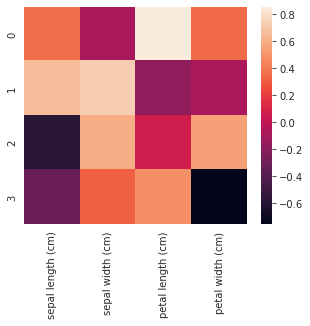

In [ ]:
# heatmap
sns.heatmap(comps)

# Análise de Outliers
útil para o pre-processamento de dados para análise e machine learning
é um método analítico por si só

São três tipos: 
- Outliers Pontuais: observações anômalas qando comparadas à maioria das observações em uma variável
- Outliers de Contexto: observações anômalas quando em um contexto específico
- Outliers Coletivos: uma coleção de obervações anômalas que aparecem em proximidade pois todas apresentam o mesmo comportamento anômalo

A análise de outliers, como método analitico, pode ser utilizada para descobrir anomalias que representam: falhas de equipamentos, fraude, eventos de cybersegurança, entre outros.

## Análise de valores extremos usando métodos univariados

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 7.5,6
sns.set_style('whitegrid')

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

### Usando boxplots para identificar outliers

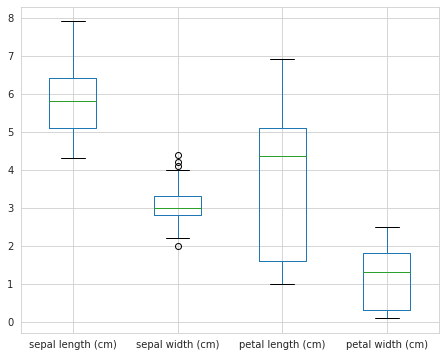

In [ ]:
df.boxplot()

In [ ]:
larg_cepa = df['sepal width (cm)']
iris_outliers = larg_cepa > 4
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2


In [ ]:

iris_outliers = larg_cepa < 2.05
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0


### Aplicando a identificação de outlier de Tukey

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
x_df = pd.DataFrame(df['sepal width (cm)'])
sumario = x_df.describe()
print(sumario)

       sepal width (cm)
count            150.00
mean               3.06
std                0.44
min                2.00
25%                2.80
50%                3.00
75%                3.30
max                4.40


#### Calculando os limites inferior e superior do intervalo entre quaartis

In [ ]:
iqr = sumario.loc['75%'] - sumario.loc['25%']
iqr # a diferença entre o primeiro quartil e o terceiro quartil é de 0.5

sepal width (cm)   0.50
dtype: float64

In [ ]:
limite_inferior = sumario.loc['25%'] - iqr * 1.5
limite_inferior

sepal width (cm)   2.05
dtype: float64

In [ ]:
limite_superior = sumario.loc['75%'] + iqr * 1.5
limite_superior

sepal width (cm)   4.05
dtype: float64

## Análise Multivalorada para detecção de outlier

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

df = sns.load_dataset("iris")
df.columns=['comp da cepa', 'larg da cepa', 'comp da pétala', 'larg da pétala', 'espécie']


#### Inspecionando boxplots visualmente

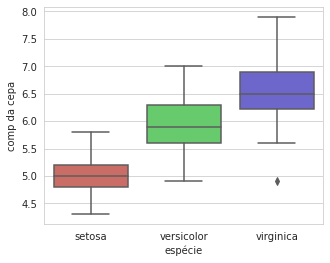

In [ ]:
sns.boxplot(x='espécie', y='comp da cepa', data=df, palette='hls')

#### Olhando a matriz de scatterplots

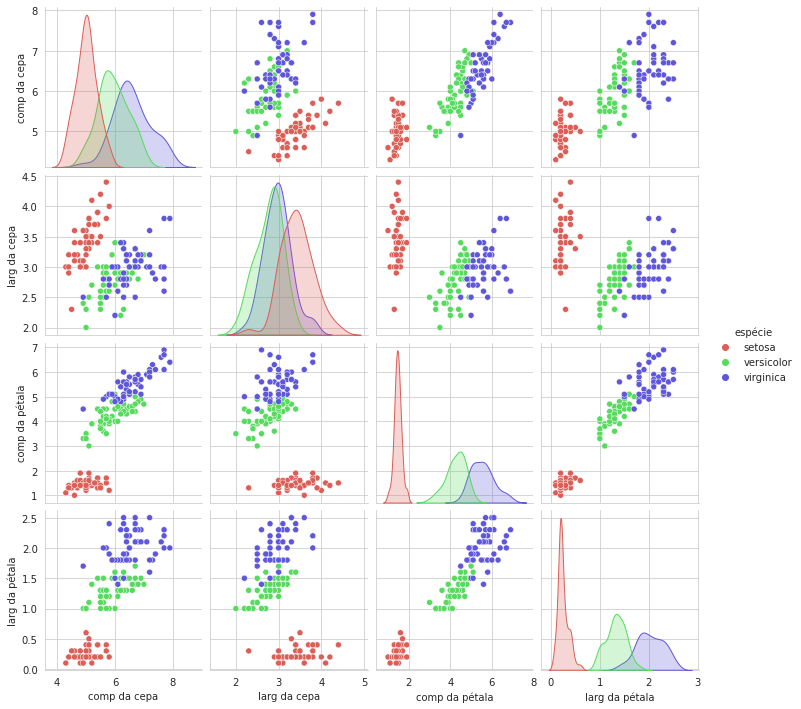

In [ ]:
sns.pairplot(df, hue='espécie', palette='hls')

# Usando DBSCAN

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn.cluster import DBSCAN
from collections import Counter

%matplotlib inline
rcParams['figure.figsize'] = 7.5,6
sns.set_style('whitegrid')

df = sns.load_dataset("iris")
cols=['comp da cepa', 'larg da cepa', 'comp da pétala', 'larg da pétala', 'espécie']
df.columns = cols
x = df[cols[:4]].values
y = df['espécie'].values

### Treinando o modelo para identificaar outliers

In [ ]:
modelo = DBSCAN(eps=0.8, min_samples=19).fit(x)
print(modelo)

DBSCAN(eps=0.8, min_samples=19)


#### Visualizando resultados

In [ ]:
outliers_df = pd.DataFrame(x)
print(Counter(modelo.labels_))

Counter({1: 94, 0: 50, -1: 6})


In [ ]:
filtro = modelo.labels_ == -1
print(outliers_df[filtro])

       0    1    2    3
98  5.10 2.50 3.00 1.10
105 7.60 3.00 6.60 2.10
117 7.70 3.80 6.70 2.20
118 7.70 2.60 6.90 2.30
122 7.70 2.80 6.70 2.00
131 7.90 3.80 6.40 2.00


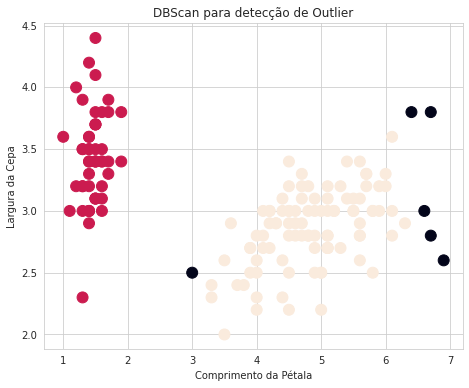

In [ ]:
cores = modelo.labels_

plt.scatter(x[:,2], x[:,1], c=cores, s=120)
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Cepa')
plt.title('DBScan para detecção de Outlier')
plt.show()

# Análise de Clusters
Métodos de clusterização:
- Clusterização **K-means**: algoritmo de clusterização não-supervisionada no qual sabemos a quantidade de clusters.
- **Clusterização hierárquica**: algoritmo de clusterização não-supervisionada no qual não sabemos a quantidade de clusters
- **Classificação KNN**: algoritmo de classificação supervisionada

## Clusterização **K-means**
Algoritmo de clusterização não-supervisionada no qual sabemos a quantidade de clusters. Permite a identificação de grupos nos dados. É necessário ter uma ideia da quantidade de clusters que os dados vão formar, antes de usar o modelo. As predições são baseadas em dois fatores:
- O número de centróides(grupos que quero encontrar) presentes (k)
- Valores médios mais próximos (medidos como distência Euclidiana entre as observações)

Casos de uso:
- Modelagem e custo de mercado
- segmentação de usuário
- detecção de fraude em seguro

Quando usar o K-means...
- Coloque suas variáveis em escala
Olhe para o scatterplot para estimar o número de centróides e definir o valor do parâmentro K no modelo


- **Precisão**(precision): a medida de relevância do modelo. Das respostas encontradas, qual a porcentagem de respostas relevantes.
- **Revocação**(recall): a medida de completude do modelo. Qual a porcentagem encontrada das respostas relevantes possíveis.

`alta precisão + alto recall = resultados com alta acurácia`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report # usado para calcular a precisão e arevocação do modelo

%matplotlib inline
rcParams['figure.figsize'] = 7,4
plt.style.use('seaborn-whitegrid')


In [ ]:
iris = datasets.load_iris()
x = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names

### Construindo e rodando o seu modelo

In [ ]:
# 3 clusters pois seis que são três espécies de flores
# random_state=5 para gerar um resultado igual ao da vídeo aula
clustering = KMeans(n_clusters=3, random_state=5).fit(x)
clustering


KMeans(n_clusters=3, random_state=5)

### Graficando o reslutado do modelo

Text(0.5, 1.0, 'Resultado do KMeans')

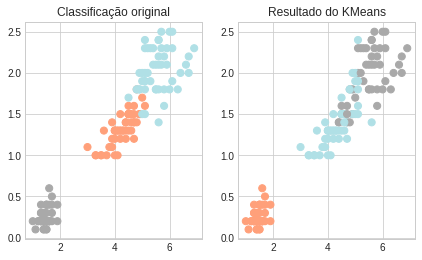

In [ ]:
cores = np.array(['darkgray', 'lightsalmon', 'powderblue'])

# método subplot para criar gráficos um ao lado do outro
# permite fazer comparações
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação original')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[clustering.labels_],
            s=50)
plt.title('Resultado do KMeans')

Text(0.5, 1.0, 'Resultado do KMeans')

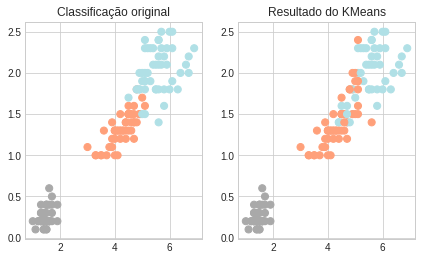

In [ ]:
# corrigindo as cores
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação original')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[relabel],
            s=50)
plt.title('Resultado do KMeans')

### Avaliando a clusterização resultante

In [ ]:
metricas = classification_report(y, relabel)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Métodos hierárquicos
Método não supervisionado que pode ser usado para prever agrupamentos baseados na distância entre observações.

Encontre o número de subgrupos olhando para um dendograma, que é um gráfico em formato de árvore que é útil para mostrar visualmente taxonomias, linhagens e relacionamentos entre observações.

Casos de uso:
- Gerenciamento de recusros hospitalares
- Linhagem genética
- Segmentação de usuário
- Análise de redes sociais

É necessáqio, também, indicar quantos centróides serão utilizados, para isso o dendograma é útil.

Parâmetros importantes:
- Métricas de distância: Eclidian (euclidiano), Manhattan, cosine (cosseno). *Define o formato utilizado para calcular a distância*.
- Parâmetros de conexão: Ward, complete, average. *Define como é feita a conexão entre observações*.

Para escolher qual combinação usar, entre métrica de distância e de conexão, é preciso analisar todas as possibilidades e escolher a que tiver maior acurácia.  (tentavia e erro)

In [23]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

caminho ='/content/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'qtd_marchas', 'carb']

x = carros[['mpg', 'disp', 'hp', 'wt']].values
y = carros['am'].values

### Usando scipy para gerar dendrogramas

In [24]:
# novo conjunto de dados que é resposta do cálculo das distâncias
z = linkage(x, 'ward')

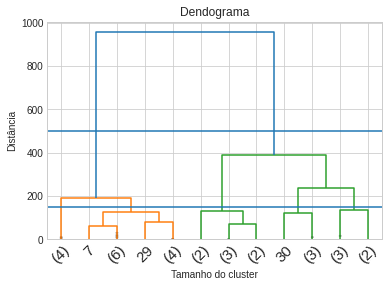

In [25]:
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Dendograma')
plt.xlabel('Tamanho do cluster')
plt.ylabel('Distância')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

### Gerando clusters hierárquicos
tentativa e erro. Observamos que as melhores combinações são dos métodos(euclidean + ward) e (euclidean + average)

In [26]:
k= 2

hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(x)
accuracy_score(y, hclusters.labels_)

0.78125

In [27]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete').fit(x)
accuracy_score(y, hclusters.labels_)

0.4375

In [28]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average').fit(x)
accuracy_score(y, hclusters.labels_)

0.78125

In [29]:
hclusters = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average').fit(x)
accuracy_score(y, hclusters.labels_)

0.71875

## Método de classificação KNN
é um classificador supervisionado que decora observações de um conjunto de teste identificado para predizer a identificação de novas observações. KNN faz predições baseado em quaõ similares as observações de treinoi são em relação às novas observações. Quanto mais similares os valores, mais provável é que uma nova observação tenha o mesmo identificador.

Casos de uso
- Predição de preço de ações
- Sistemas recomendação
- Análise de risco de crédito
- Planejamento preditivo de viagens

Pressupostos
- Conjunto de dados com pouco ruído
- Conjunto de dados identificados
- Conjunto de dados só contém variáveis relevantes
- Conjunto de dados tem subgrupos claros

Evitar usar o KNN em conjuntos grandes, pois, possivelmente irá demorar para rodar.

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
sns.set_style('whitegrid')

caminho ='/content/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'qtd_marchas', 'carb']

X = carros[['mpg', 'disp', 'hp', 'wt']].values

y = carros['am'].values

### Dividindo dados em teste e treino

In [50]:
X = preprocessing.scale(X)

In [57]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.33, random_state=17)

### treinando o modelo

In [58]:
clf = KNeighborsClassifier()

clf.fit(X_treino, y_treino)
print(clf)

KNeighborsClassifier()


### avaliandoo desempenho do moelo com os dados de teste

In [59]:
y_esperado = y_teste
y_predito = clf.predict(X_teste)

print(classification_report(y_esperado, y_predito))

# podemos observar que pra variável 1, carros manuais, oude uma precisão de 100% e recall de 67%

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11

